In [1]:
from fastai.vision.all import *

In [2]:
import torch
torch.backends.mps.is_available() # metal GPU acceleration

True

In [3]:
FPS = 3
H, W, C = 512, 512, 3
NUM_FRAMES = 30 # 10s

In [4]:
dls = ImageDataLoaders.from_folder(Path("frames/labeled_data"), valid_pct=0.2, item_tfms=Resize(224), device="mps")

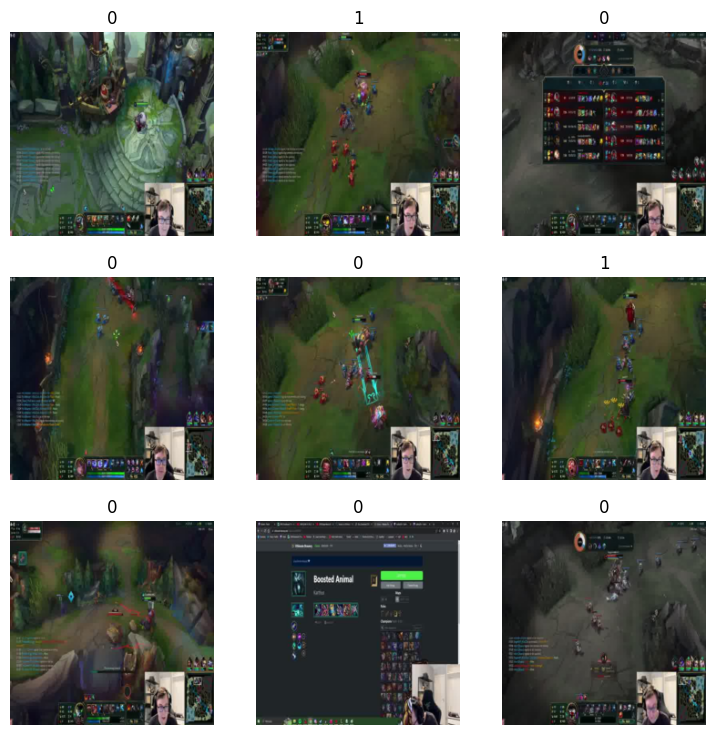

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, F1Score()])
learn.fine_tune(1)

/Users/londogard/micromamba/envs/lol_highlights/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/londogard/micromamba/envs/lol_highlights/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.178596,0.146390,0.056380,22:27


epoch,train_loss,valid_loss,error_rate,time
0,0.032133,0.031587,0.010950,32:55


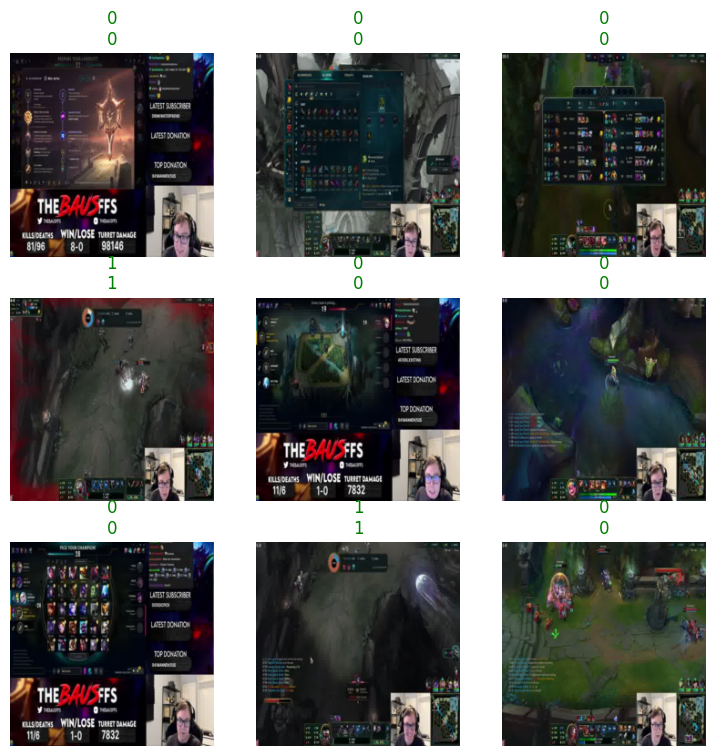

In [15]:
learn.show_results()

In [ ]:
learn.save("fast_ai_resnet34")

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

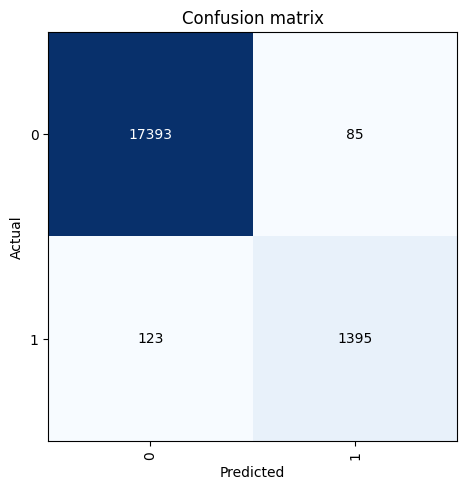

In [20]:
interp.plot_confusion_matrix()

In [21]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17478
           1       0.94      0.92      0.93      1518

    accuracy                           0.99     18996
   macro avg       0.97      0.96      0.96     18996
weighted avg       0.99      0.99      0.99     18996



In [22]:
interp.most_confused()

[('1', '0', 123), ('0', '1', 85)]

In [44]:
next(learn.model.parameters()).device # MPS = Mac Metal GPU

device(type='mps', index=0)